In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing
import mglearn
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

from sklearn.svm import SVC #SVM
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기

# 5일차 팀과제

- 현대 자동차 - 데이터를 이용
- 가격:1135 
- 년식:2015
- 연비: 15
- 마력:100
- 토크:13.6
- 연료:가솔린
- 하이브리드:0
- 배기량:1368
- 중량:1035
- 변속기:수동

인경우 종류( 준중형, 소형, 대형)를 예측하시요.<br>from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing
import mglearn
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

from sklearn.svm import SVC #SVM
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기

1. KNN, decision tree, naive_bayes, svc 각각의 모델에 대해 각모델별 예측값 구하시요.
2. f1 score(train, test) , confusion matrix를 구하시요
3. 각모델별 train ,test f1 를  bar 그래프로 그리고 가장높은 f1 score 의 모델을 확인하시요.


In [2]:
# 데이터 불러오기
df = pd.read_excel('C:/Users/medici/Desktop/국비교육/Python/머신러닝/Sklean/data4/hyundaiCar.xlsx')
df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


## 문제1) KNN, decision tree, naive_bayes, svc 각각의 모델에 대해 각모델별 예측값 구하시요.

### 1) KNN모델

In [3]:
x_data = df.drop('종류', axis=1)
y_data = df['종류'].replace( ['대형', '중형', '준중형', '소형'], [0,1,2,3])

In [4]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2,
                                                   stratify=y_data, random_state=1)

In [5]:
ct = make_column_transformer( (OneHotEncoder(),['연료','변속기']),remainder='passthrough' )

In [6]:
model_knn = make_pipeline( ct, StandardScaler(), KNeighborsClassifier( n_neighbors=3 ) )
model_knn.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [7]:
model_knn.score(x_train, y_train)

0.875

In [8]:
model_knn.score(x_test, y_test)

0.8666666666666667

In [25]:
# 예측값
xd = np.array([[1135,2015,15,100,13.6,'가솔린',0,1368,1035,'수동']])
xdata_F = pd.DataFrame( xd, columns=x_test.columns)
xdata_F

,가격,년식,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1135,2015,15,100,13.6,가솔린,0,1368,1035,수동


In [26]:
# knn예측
model_knn.predict(xdata_F)

array([3], dtype=int64)

In [27]:
param_value = { 'kneighborsclassifier__n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(model_knn,
                          param_grid=param_value, scoring='f1_macro')
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['연료',
                                                                          '변속기'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10]},
             scoring='f1_macro')

In [28]:
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 4}

In [29]:
grid_search.best_score_

0.691111111111111

In [30]:
# gridsearch로 최적의 파라메터로 계산시
grid_search.best_estimator_.predict(xdata_F)

array([2], dtype=int64)

### 2) decision tree 모델

In [31]:
model_tree = make_pipeline( ct, StandardScaler(), DecisionTreeClassifier( criterion="entropy" ) )
model_tree.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [32]:
model_tree.score(x_train, y_train)

1.0

In [33]:
model_tree.score(x_test, y_test)

0.8666666666666667

In [34]:
model_tree.predict(xdata_F)

array([3], dtype=int64)

In [35]:
param_value = { 'decisiontreeclassifier__max_depth' : [1,2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(model_tree,
                          param_grid=param_value, scoring='f1_macro')
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['연료',
                                                                          '변속기'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             param_grid={'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10]},
             scoring='f1_macro')

In [36]:
grid_search.best_params_

{'decisiontreeclassifier__max_depth': 8}

In [37]:
grid_search.best_score_

0.8762698412698413

In [38]:
grid_search.best_estimator_.predict(xdata_F)

array([3], dtype=int64)

### 3) naive_bayes 모델

In [39]:
model_bayes = make_pipeline( ct, StandardScaler(), GaussianNB() )
model_bayes.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [40]:
model_bayes.score(x_train, y_train)

0.6428571428571429

In [41]:
model_bayes.score(x_test, y_test)

0.6

In [42]:
model_bayes.predict(xdata_F)

array([3], dtype=int64)

### 4) SVC 모델

In [43]:
# x 대문자 변환
X_data = x_data.copy()
X_train = x_train.copy()
X_test = x_test.copy()

In [44]:
model_SVC = make_pipeline( ct, StandardScaler(), SVC() )
model_SVC.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

In [45]:
model_SVC.score(X_train, y_train)

0.8571428571428571

In [46]:
model_SVC.score(X_test, y_test)

0.7333333333333333

In [49]:
model_SVC.predict(xdata_F)

array([3], dtype=int64)

In [50]:
param_value= { 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'svc__C':list(range(0,11)),
              'svc__gamma':['scale', 'auto']}
grid_search = GridSearchCV(model_SVC, param_grid=param_value,scoring='f1_macro')
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit 

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['연료',
                                                                          '변속기'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='f1_macro')

In [51]:
grid_search.best_params_

{'svc__C': 6, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [53]:
grid_search.best_score_

0.7773809523809523

In [54]:
grid_search.best_estimator_.predict(xdata_F)

array([3], dtype=int64)

## 문제2) f1 score(train, test) , confusion matrix를 구하시요

In [55]:
# SVC모델로 F1 SCORE와 CM 구해봄
y_train_pred_svc = model_SVC.predict(X_train)
y_test_pred_svc = model_SVC.predict(X_test)

In [56]:
f1_score(y_train, y_train_pred_svc, average='macro')

0.8389130434782609

In [57]:
f1_score(y_test, y_test_pred_svc,  average='macro')

0.7083333333333334

In [58]:
cm = confusion_matrix(y_train, y_train_pred_svc)

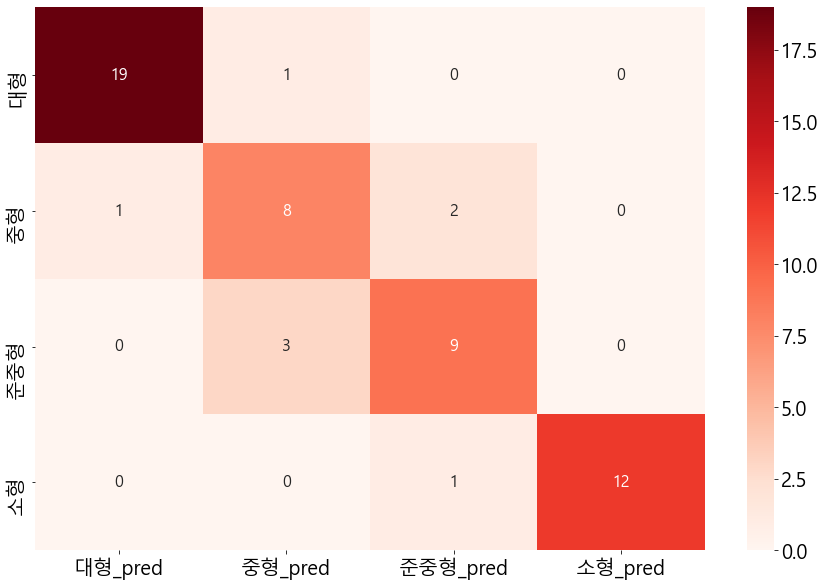

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=['대형_pred', '중형_pred', '준중형_pred', '소형_pred'], 
           yticklabels=['대형', '중형', '준중형', '소형'], annot_kws={'size':16})
plt.show()

## 문제3)각모델별 train ,test f1 를 bar 그래프로 그리고 가장높은 f1 score 의 모델을 확인하시요.

In [61]:
# knn 모델
y_train_pred_knn =  model_knn.predict(x_train)
y_test_pred_knn =  model_knn.predict(x_test)

f1_train_knn = f1_score(y_train, y_train_pred_knn, average='macro')
f1_test_knn = f1_score(y_test, y_test_pred_knn, average='macro')

print(f1_train_knn )
print(f1_test_knn )

0.8664214046822742
0.875


In [62]:
# decision tree 모델
y_train_pred_tree =  model_tree.predict(x_train)
y_test_pred_tree =  model_tree.predict(x_test)

f1_train_tree = f1_score(y_train, y_train_pred_tree, average='macro')
f1_test_tree = f1_score(y_test, y_test_pred_tree, average='macro')

print(f1_train_tree )
print(f1_test_tree )

1.0
0.875


In [63]:
# naive_bayes 모델
y_train_pred_bayes =  model_bayes.predict(x_train)
y_test_pred_bayes =  model_bayes.predict(x_test)

f1_train_bayes = f1_score(y_train, y_train_pred_bayes, average='macro')
f1_test_bayes = f1_score(y_test, y_test_pred_bayes, average='macro')

print(f1_train_bayes)
print(f1_test_bayes)

0.6129823202993934
0.5318181818181817


In [64]:
# SVC 모델
y_train_pred_svc =  model_SVC.predict(x_train)
y_test_pred_svc =  model_SVC.predict(x_test)

f1_train_svc = f1_score(y_train, y_train_pred_svc, average='macro')
f1_test_svc = f1_score(y_test, y_test_pred_svc, average='macro')

print(f1_train_svc)
print(f1_test_svc)

0.8389130434782609
0.7083333333333334


In [65]:
data = [f1_train_knn, f1_test_knn, f1_train_tree, f1_test_tree, 
        f1_train_bayes, f1_test_bayes, f1_train_svc, f1_test_svc]

data = pd.DataFrame(data=data, index=['knn_train', 'knn_test', 'tree_train',' tree_test',
                                     'bayes_train', 'bayes_test', 'svc_train', 'svc_test'],
                   columns=['f1 score'])
data

,f1 score
knn_train,0.866421
knn_test,0.875000
tree_train,1.000000
tree_test,0.875000
bayes_train,0.612982
bayes_test,0.531818
svc_train,0.838913
svc_test,0.708333


In [66]:
x = data.index.values
y = np.array(data['f1 score'])

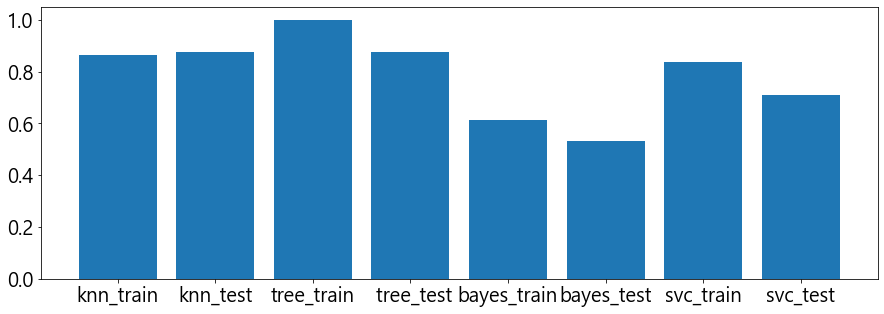

In [71]:
plt.figure(figsize=(15,5))
plt.bar(x, y)
plt.show()